<a href="https://colab.research.google.com/github/tushwagh/Yes-Bank-Stock-Price-Prediction./blob/main/Yes_Bank_Stock_Price_Prediction_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title - Yes Bank Stock Price Prediction**

### **Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.**

**Data Description**

We've the YES BANK Stock price dataset which has the monthly stock prices of the bank since its inception. It contains the following features:

**Date:** It denotes date of investment done (in our case we have month and year).

**Open:** Open means the price at which a stock started trading when the opening bell rang.

**High:** High refer to the maximum prices in a given time period.

**Low:** Low refer to the minimum prices in a given time period.

**Close:** Close refers to the price of an individual stock when the stock exchange closed for the day.

**Objective of Project**

To determine the YES bank's stock’s future value on the national stock exchange. The advantage of a successful prediction of a stock's future price could results insignificant profit. The efficient-market hypothesis recommends that stock costs mirror all right now accessible data and any value changes that are not founded on recently uncovered data subsequently are an unpredictable.We have to build model which help us to predict the future stock prices.

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
##Import libraries for Regressor
import math
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#Read CSV file to pandas dataframe
df=pd.read_csv('/content/drive/MyDrive/YES BANK STOCK PRICE PREDICTION/data_YesBank_StockPrices.csv')

In [ ]:
#look for top 10 rows
df.head(10)

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
5,Dec-05,13.49,14.44,13.00,13.71
6,Jan-06,13.68,17.16,13.58,15.33
7,Feb-06,15.50,16.97,15.40,16.12
8,Mar-06,16.20,20.95,16.02,20.08
9,Apr-06,20.56,20.80,18.02,19.49


In [ ]:
#look for bottom 10 rows

df.tail(10)

,Date,Open,High,Low,Close
175,Feb-20,39.10,40.70,33.60,34.55
176,Mar-20,35.20,87.95,5.55,22.45
177,Apr-20,22.30,30.45,20.30,27.95
178,May-20,27.80,31.60,25.20,26.85
179,Jun-20,27.75,31.95,25.55,25.60
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [ ]:
#shape of dataset
df.shape

(185, 5)

In [ ]:
#Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [ ]:
#Description of Dataset
df.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


In [ ]:
#Looking for any null values.
df.isnull().sum().sum()

0

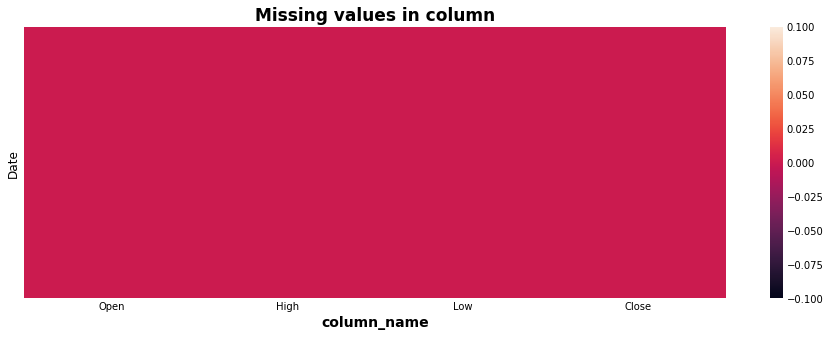

In [ ]:
#Looking for null values by plotting Heatmap
plt.figure(figsize=(14, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("Missing values in column",fontweight="bold",size=17)
plt.show()

## **Exploratory Data Analysis**

### **Data Cleaning**

In [ ]:
#Importing Datetime to set date format
from datetime import datetime
df['Date']=pd.to_datetime(df['Date'].apply(lambda x:datetime.strptime(x,'%b-%y')))


In [ ]:
df.set_index('Date',inplace=True)
df.index.freq = 'MS'

In [ ]:
df.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


### **DATA VISUALIZATION**

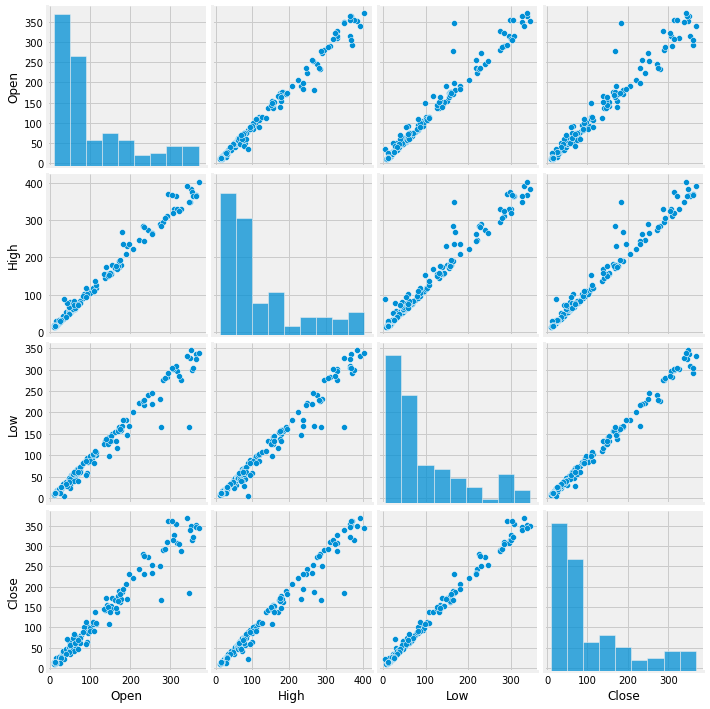

In [ ]:
#To plot multiple pairwise bivariate distributions in a dataset
sns.pairplot(df,kind="scatter")

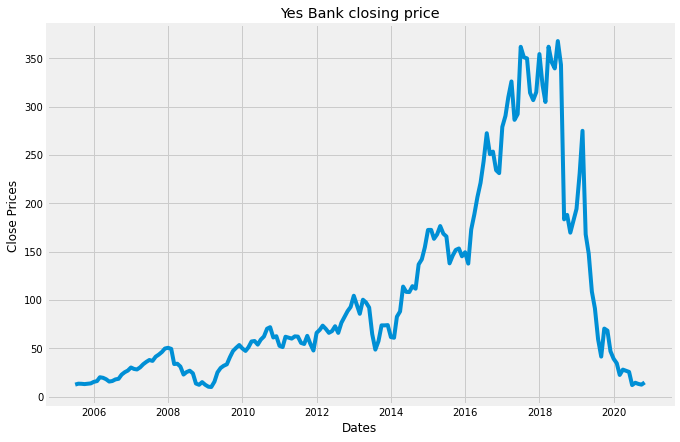

In [ ]:
plt.figure(figsize=(10,7))
plt.xlabel('Dates')
plt.ylabel('Close Prices ')
plt.plot(df['Close'])
plt.title('Yes Bank closing price')
plt.show()

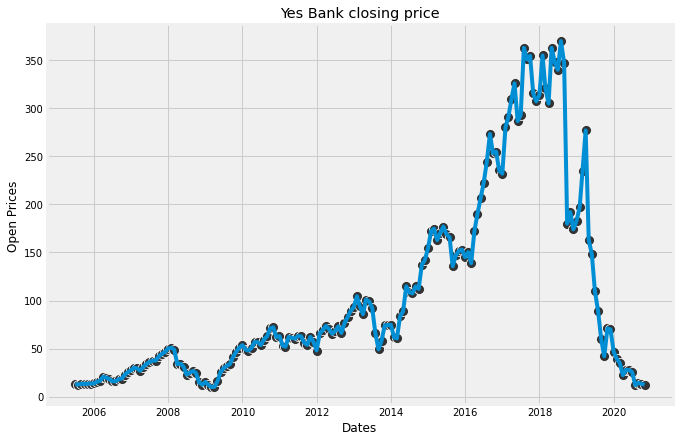

In [ ]:
plt.figure(figsize=(10,7))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open Prices ')
plt.plot(df['Open'])
plt.title('Yes Bank closing price')
sns.scatterplot(data=df, x="Date", y="Open", s=100, color=".2")

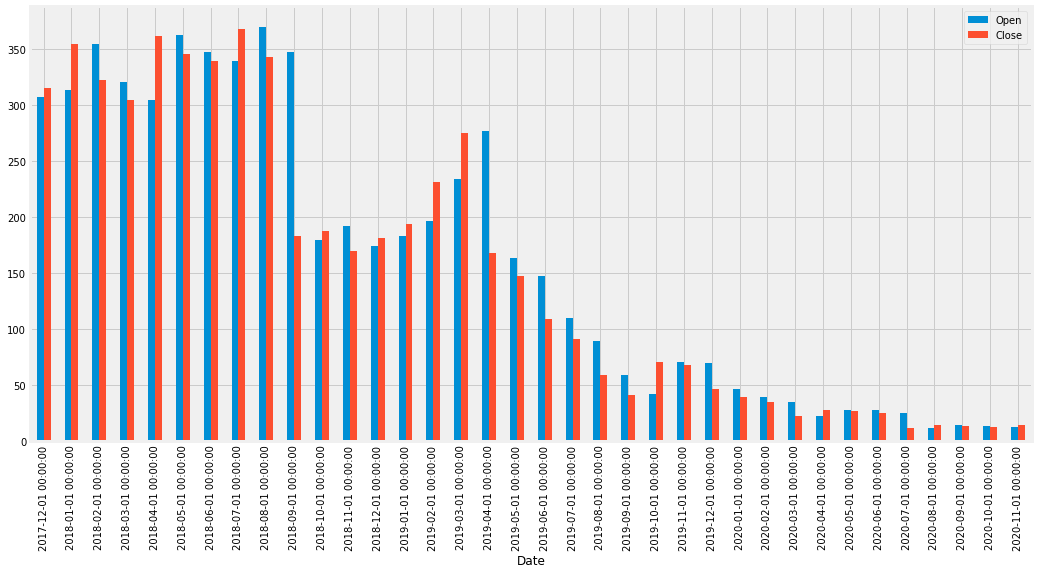

In [ ]:
#Plot Open vs Close
df[['Open','Close']].tail(36).plot(kind='bar',figsize=(16,8)) #only last three year record
plt.show()